## Pymaceuticals Inc. (Matplotlib Challenge)
----
#### Author: Felipe Murillo
#### Date: April 27, 2020
#### Description: Pymaceuticals, Inc. is screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. Animal data presented here is manipulated to provide insight about different drug regimens' effectivity
#### Required inputs: /data/Mouse_metadata.csv and /data/Study_results.csv
----

## Observations and Insights

#1. Ramicane and Capomulin yielded the smallest tumors at the end of the drug regimen. Beware: it's not to say these are the most effective regimens. Upon further observation, the mice exposed to these regimens weighed much less than mice used in other regimens (including, placebo case). Further analysis is required to make a fair comparison.

#2. For Capomulin, final tumor volume is strongly correlated to mouse weight (e.g., the heavier the mouse, the more voluminous the tumor)

#3. Mouse ID = c326 is the only outlier found in the complete dataset, with a final tumor volume smaller than the rest of the mice under the Infubinol drug regimen. It reacted very well to the drug regimen, but why only this mouse? (possible mistake with an incorrect volume measurement or a real-life outlier worth further investigation)

----

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [4]:
# Peek mouse data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [80]:
# Peek study data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
combo = mouse_metadata.merge(study_results,on="Mouse ID")
combo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [7]:
# Group by Drug regimen and grab tumor volume data
drugRegimenTumorVol = combo.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Calculate mean tumor volume for each regimen
tumorMean = drugRegimenTumorVol.mean().rename("Tumor Mean")

# Calculate median tumor volume for each regimen
tumorMedian = drugRegimenTumorVol.median().rename("Tumor Median")

#Calculate variance and STD in tumor volume for each regimen
tumorVariance = drugRegimenTumorVol.var().rename("Tumor Variance")
tumorSTD = drugRegimenTumorVol.std().rename("Tumor STD")

# Calculate standard error of mean (SEM) for tumor volume
tumorSEM = drugRegimenTumorVol.sem().rename("Tumor SEM")

In [8]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen
tumorSummary = pd.concat([tumorMean,tumorMedian,tumorVariance, tumorSTD, tumorSEM],axis=1)

# Format contents of summary table
for i in tumorSummary.columns:
    tumorSummary[i] = tumorSummary[i].map('{:,.3f}'.format)

# Center items in table
tumorSummary.style.set_properties(**{'text-align': 'center'})

,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

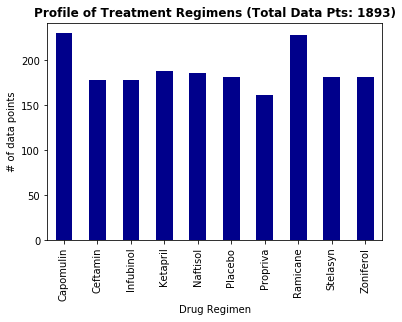

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
(
    combo
    .groupby("Drug Regimen")["Mouse ID"]
    .count()
    .plot(kind="bar", color = "darkblue")
)

# Format the bar graph
plt.ylabel("# of data points")
plt.title(f"Profile of Treatment Regimens (Total Data Pts: {combo.shape[0]})",fontweight="bold")
plt.show()


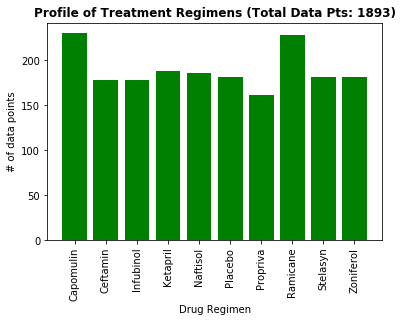

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_pts = combo.groupby("Drug Regimen")["Mouse ID"].count()
x_labels = list(data_pts.index)

plt.bar(x_labels,data_pts,color="green")

# Format the bar graph
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of data points")
plt.title(f"Profile of Treatment Regimens (Total Data Pts: {combo.shape[0]})",fontweight="bold")
plt.show()

## Pie plots

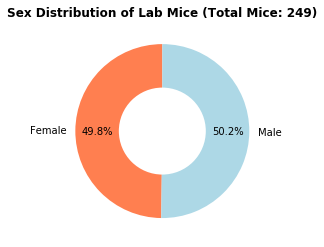

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
(
    mouse_metadata
    .groupby("Sex")["Mouse ID"]
    .count()
    .plot(kind="pie",
          autopct='%1.1f%%',
          colors = ["coral","lightblue"],
          pctdistance = 0.75,
          startangle = 90)
) 

#Create title
plt.title(f"Sex Distribution of Lab Mice (Total Mice: {mouse_metadata.shape[0]})",fontweight = "bold")

#Draw white circle (for fun)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Remove y-axis label
plt.axis("off")

plt.show()

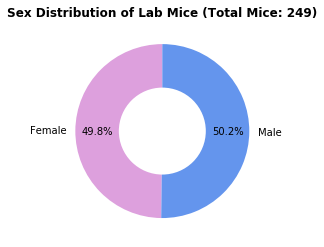

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pts = mouse_metadata.groupby("Sex")["Mouse ID"].count()
sex_labels = sex_pts.index

plt.pie(sex_pts,
        labels = sex_pts.index,
        autopct='%1.1f%%',
        colors = ["plum","cornflowerblue"],
        pctdistance = 0.75,
        startangle = 90)

#Create title
plt.title(f"Sex Distribution of Lab Mice (Total Mice: {mouse_metadata.shape[0]})",fontweight = "bold")

#Draw white circle (for fun)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin.

# Pull a subset of the combo data set to manipulate tumor data
tumorData = combo[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
tumorData.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729


In [14]:
#Organize data into a pivot tabel for better visualization/manipulation
table = pd.pivot_table(tumorData, 
                       values="Tumor Volume (mm3)", 
                       index = ["Drug Regimen","Mouse ID"],
                       columns = "Timepoint")

# Add a column to end of table to record final volume (last non-NaN value in a row)
table["Final Tumor Volume (mm3)"] = table.ffill(axis=1).iloc[:, -1]

table.head(10)

Timepoint                 0          5         10         15         20  \
Drug Regimen Mouse ID                                                     
Capomulin    b128      45.0  45.651331  43.270852  43.784893  42.731552   
             b742      45.0  41.534097  41.999228  39.524843  37.950355   
             f966      45.0  38.796474  35.624403  32.623003  30.485985   
             g288      45.0  45.839400  46.304003  42.172301  42.957120   
             g316      45.0  44.022752  44.502042  45.216743  45.933322   
             i557      45.0  42.261665  42.992077  43.529876  43.967895   
             i738      45.0  45.595685  43.421014  37.978778  38.531136   
             j119      45.0  45.838998  46.425366  47.322984  48.158209   
             j246      45.0  45.641438  46.408361  43.312654  44.020370   
             l509      45.0  45.851193  46.759074  47.488599  48.070452   

Timepoint                     25         30         35         40         45  \
Drug Regimen Mouse ID                                                          
Capomulin    b128      43.262145  40.605335  37.967644  38.379726  38.982878   
             b742      38.617684  39.167949  39.847576  38.255627  38.939633   
             f966            NaN        NaN        NaN        NaN        NaN   
             g288      42.368692  42.874461  38.954115  36.356851  37.074024   
             g316      46.809225  44.221480  44.702833  45.565821  40.159220   
             i557      44.596219  45.261384  45.941949  46.821070  47.685963   
             i738      34.973438  35.578780  36.175953  36.843898  37.311846   
             j119      42.417166  43.013681  43.765705  44.585090  38.125164   
             j246      44.555226  38.044082  38.753265        NaN        NaN   
             l509      44.006257  44.708055  40.207289  40.770813  41.483008   

Timepoint              Final Tumor Volume (mm3)  
Drug Regimen Mouse ID                            
Capomulin    b128                     38.982878  
             b742                     38.939633  
             f966                     30.485985  
             g288                     37.074024  
             g316                     40.159220  
             i557                     47.685963  
             i738                     37.311846  
             j119                     38.125164  
             j246                     38.753265  
             l509                     41.483008

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
drugFinalVolMean = table.groupby("Drug Regimen")["Final Tumor Volume (mm3)"].mean()

#List drugs yielding the smallest mean tumors at the end of the treatment
drugFinalVolMean = drugFinalVolMean.sort_values(ascending=True).reset_index()
drugFinalVolMean

,Drug Regimen,Final Tumor Volume (mm3)
0,Ramicane,36.191390
1,Capomulin,36.667568
2,Propriva,56.736964
3,Ceftamin,57.753977
4,Infubinol,58.178246
5,Zoniferol,59.181258
6,Placebo,60.508414
7,Stelasyn,61.001707
8,Naftisol,61.205757
9,Ketapril,62.806191


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

rows = []
# Calculate quartiles, iqr and upper/lower bounds for each drug regimen
for drug in drugFinalVolMean["Drug Regimen"]:
    quartiles = table.loc[drug,"Final Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = quartiles[0.5]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    rows.append([drug,lowerq,mean,upperq,iqr,lower_bound,upper_bound])

iqr_table = pd.DataFrame(rows, columns=["Drug Regimen",
                                        "Lower Quartile", 
                                        "Mean",
                                        "Upper Quartile", 
                                        "IQR",
                                        "Lower Bound",
                                        "Upper Bound"
                                       ])

# Sort table by tumor volume (small to big)
iqr_table = iqr_table.set_index("Drug Regimen").sort_values("Mean")
iqr_table

,Lower Quartile,Mean,Upper Quartile,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,,
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Propriva,49.122969,55.841410,62.570880,13.447911,28.951103,82.742746
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Zoniferol,49.988302,61.840058,66.794156,16.805854,24.779522,92.002936
Placebo,52.942902,62.030594,68.134288,15.191386,30.155822,90.921368
Stelasyn,52.476596,62.192350,69.103944,16.627349,27.535572,94.044968
Naftisol,52.079510,63.283288,69.563621,17.484111,25.853344,95.789787


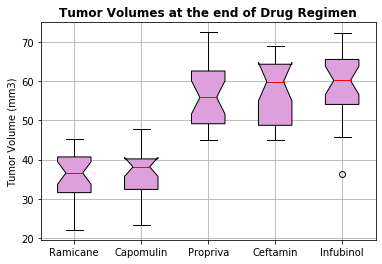

In [143]:
# Generate a box plot of the final tumor volume of each mouse across five regimens yielding the smallest tumors

labels = []
data = []

for drug in iqr_table.index[0:5]:
    labels.append(drug)
    data.append(table.loc[drug,"Final Tumor Volume (mm3)"])

fig1, ax = plt.subplots()
ax.boxplot(data,
           whis = 1.5,
           labels = labels, 
           notch=True, 
           patch_artist=True, 
           boxprops=dict(facecolor="plum"),
           medianprops=dict(color="red")
          )

# Format the boxplot 
ax.set_title('Tumor Volumes at the end of Drug Regimen',fontweight = "bold")
ax.set_ylabel('Tumor Volume (mm3)')
ax.grid()  
plt.show()

In [18]:
# Manually locate the sole outlier rat in the Infubinol data set
outlier_infubinol = table.loc["Infubinol","Final Tumor Volume (mm3)"] < iqr_table.loc["Infubinol","Lower Bound"]

print (f"The outlier in the Infudinol sample is {outlier_infubinol[outlier_infubinol==True].index[-1]}")

The outlier in the Infudinol sample is c326


## Line and scatter plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Allow user to enter the desired Mouse ID's data from a list of allowable values
drugRegimen = "Capomulin"
options = tumorData.loc[tumorData["Drug Regimen"] == drugRegimen]["Mouse ID"].unique()
mouseID = input(f'Select a mouse undertaking the {drugRegimen} drug regimen from the following options:\n {options}\n ')

if mouseID not in options:
    print(f"\033[91m \033[1m Invalid selection. Please try again!")
    
    

Select a mouse undertaking the Capomulin drug regimen from the following options:
 ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']
 j119


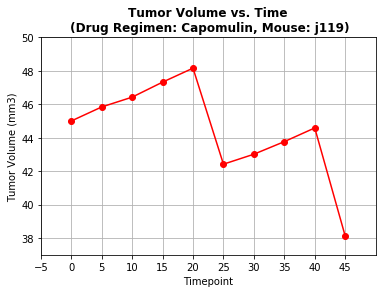

In [23]:
# Plot timeplot vs. tumor volume for desired mouse ID
(
    table
    .loc[drugRegimen,mouseID]
    .drop(["Final Tumor Volume (mm3)"])
    .plot(kind="line",y="Final Tumor Volume (mm3)",marker = 'o',color = "red")
)

# Format the table
x_max = table.loc[drugRegimen,mouseID].drop(["Final Tumor Volume (mm3)"]).index.max()
x_min = 0

y_max = table.loc[drugRegimen,mouseID].drop(["Final Tumor Volume (mm3)"]).max()
y_min = table.loc[drugRegimen,mouseID].drop(["Final Tumor Volume (mm3)"]).min()

plt.title(f"Tumor Volume vs. Time\n (Drug Regimen: {drugRegimen}, Mouse: {mouseID})",fontweight ="bold")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(x_min-5,x_max +5)
plt.xticks(np.arange(x_min-5,x_max +5,5))
plt.ylim(np.floor(y_min)-1,np.ceil(y_max)+1)
plt.grid()
plt.show()


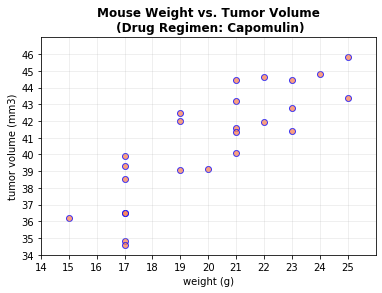

In [25]:
# Obtain drug regimen, mouse iD, mouse weight and tumor data for the Capomulin drug regimen
drugRegimen = "Capomulin"
drugWtVolData = combo.groupby(["Drug Regimen","Mouse ID","Weight (g)"])
avgVols = pd.DataFrame(drugWtVolData["Tumor Volume (mm3)"].mean()).loc[drugRegimen].reset_index()

# Generate a scatter plot of mouse weight versus average tumor volume 
x_axis = avgVols["Weight (g)"]
y_axis = avgVols["Tumor Volume (mm3)"]
(
    plt
    .scatter(
            x_axis,
            y_axis,
            marker = 'o',
            color = "coral",
            edgecolors = "blue",
            alpha = 0.75
            )
)

# Format the plot
plt.title(f"Mouse Weight vs. Tumor Volume\n (Drug Regimen: {drugRegimen})",fontweight="bold")
plt.xlabel("weight (g)")
plt.ylabel("tumor volume (mm3)")

plt.xlim(x_axis.min() -1,x_axis.max() +1)
plt.xticks(np.arange(x_axis.min()-1,x_axis.max()+1,1))
plt.yticks(np.arange(np.floor(y_axis.min()),np.ceil(y_axis.max())+1,1))
plt.ylim(np.floor(y_axis.min()),np.ceil(y_axis.max())+1)

plt.grid(alpha = 0.25)

plt.show()


In [27]:
# Calculate the correlation coefficientcorrelation = st.pearsonr(x_axis,y_axis)
correlation = st.pearsonr(x_axis,y_axis)


if correlation[0] >= 0.7:
    strength = "strong correlation"
elif correlation[0] >= 0.5:
    strength = "moderate correlation"
elif correlation[0] >=0.3:
    strength = "weak correlation"
else:
    strenght = "none or very weakc correlation"

print(f"The correlation between both factors is \033[1m{round(correlation[0],2)} ({strength})")

The correlation between both factors is 0.84 (strong correlation)


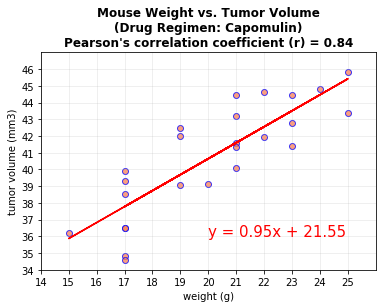

In [28]:
#Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plot
(
    plt
    .scatter(
            x_axis,
            y_axis,
            marker = 'o',
            color = "coral",
            edgecolors = "blue",
            alpha = 0.75
            )
)

# Plot format
plt.title(
            f"Mouse Weight vs. Tumor Volume\n"
            f"(Drug Regimen: {drugRegimen})\n"
            f"Pearson's correlation coefficient (r) = {round(correlation[0],2)}",fontweight="bold"
        )
plt.xlabel("weight (g)")
plt.ylabel("tumor volume (mm3)")
plt.xlim(x_axis.min() -1,x_axis.max() +1)
plt.xticks(np.arange(x_axis.min()-1,x_axis.max()+1,1))
plt.yticks(np.arange(np.floor(y_axis.min()),np.ceil(y_axis.max())+1,1))
plt.ylim(np.floor(y_axis.min()),np.ceil(y_axis.max())+1)

# Plot line of bets fit
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.grid(alpha = 0.25)
plt.show()

## >>> Extra Observations

In [117]:
# Extra: Just because I'm curious
table_x = pd.pivot_table(combo, 
                       values="Tumor Volume (mm3)", 
                       index = ["Drug Regimen","Mouse ID","Weight (g)"],
                       columns = ["Timepoint"])

# Add a column to end of table to record final volume (last non-NaN value in a row)
table_x["Final Tumor Volume (mm3)"] = table_x.ffill(axis=1).iloc[:, -1]
table_x["Size Change"] = (chgTumorSize["Final Tumor Volume (mm3)"] - chgTumorSize[0])/chgTumorSize[0]
chgTumorSize_mean = pd.DataFrame(table_x.groupby(["Drug Regimen"])["Size Change"].mean())*100
#chgTumorSize_mean = chgTumorSize_mean.sort_values(by="Size Change",ascending = True)#.reset_index()

weight_mean = combo.groupby(["Drug Regimen"])["Weight (g)"].mean()
weight_mean
final_x = chgTumorSize_mean.merge(weight_mean, on=["Drug Regimen"],how = "left").sort_values(by="Size Change")

final_x["Size Change"] = final_x["Size Change"].map("{:,.2f}%".format)
final_x["Weight (g)"] = final_x["Weight (g)"].map("{:,.2f}".format)
final_x.style.set_properties(**{'text-align': 'center'})

,Size Change,Weight (g)
Drug Regimen,,
Ramicane,-19.57%,19.68
Capomulin,-18.52%,19.97
Propriva,26.08%,27.04
Ceftamin,28.34%,27.40
Infubinol,29.28%,27.20
Zoniferol,31.51%,27.69
Placebo,34.46%,27.93
Stelasyn,35.56%,27.86
Naftisol,36.01%,27.17
